# Nanodegree Engenheiro de Machine Learning
## Projeto final - Código
Renato Rosafa Gavioli
04 de Agosto de 2018



### Carregando bibliotecas e dados

Primeiro, carrego as principais bibliotecas que irei utilizar. Em seguida, carrego os dados, que foram baixados de [https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones] para então dar uma olhada geral nos dados. 

In [1]:
# Importa as bibliotecas princiais

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Carrega os conjuntos de dados

dt_train = pd.read_csv("train.csv")
dt_test = pd.read_csv("test.csv")

Para dar uma explorada nos dados, irei olhar as primeiras linhas, e ver os valores de algumas colunas - principais descritores estatísticos...

In [3]:
# Exibe as primeiras linhas dos dados
dt_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
# Exibe os tipos de dados de cada variável
dt_train.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

Resolvi investigar se os dados são balanceados ou não, com relação à ocorrência das diferentes categorias na variável alvo:

In [5]:
# Exibe a contagem do número de observações para cada categoria da variável alvo
dt_train.groupby(['Activity'])['Activity'].count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

In [6]:
# Exibe a contagem do número de observações para cada categoria da variável alvo
dt_test.groupby(['Activity'])['Activity'].count()

Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
Name: Activity, dtype: int64

In [7]:
# Exibe os principais descritores estatísticos para cada variável
dt_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [8]:
# Exibe a média para cada variável, agrupado por atividade. 

dt_train.groupby(['Activity']).mean()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,0.269191,-0.018345,-0.107169,-0.959475,-0.937609,-0.941635,-0.961890,-0.937975,-0.940378,-0.910430,...,-0.351786,-0.665467,0.013707,0.020597,0.015828,0.010291,0.517116,-0.440820,-0.445712,17.931059
SITTING,0.273449,-0.012143,-0.106581,-0.983450,-0.936208,-0.939274,-0.985281,-0.936243,-0.936903,-0.926620,...,-0.385864,-0.687800,0.012162,0.002159,0.016712,-0.027970,-0.690818,-0.003858,-0.096152,17.987558
STANDING,0.279294,-0.016123,-0.107330,-0.985346,-0.936013,-0.942360,-0.987893,-0.937355,-0.940217,-0.922753,...,-0.349988,-0.658387,0.006748,0.010516,0.002024,0.012784,-0.773795,0.208318,0.041116,17.754003
WALKING,0.276260,-0.017768,-0.108884,-0.312641,-0.020272,-0.246279,-0.350317,-0.054420,-0.249564,-0.105249,...,-0.063395,-0.395762,0.021051,-0.011916,0.003175,-0.015134,-0.757128,0.220458,0.067578,16.462480
WALKING_DOWNSTAIRS,0.288169,-0.016370,-0.105860,0.139847,0.079184,-0.168368,0.073157,0.023240,-0.190944,0.442294,...,-0.322907,-0.665817,-0.038708,-0.021818,0.184764,-0.070523,-0.778271,0.199271,0.058975,17.089249
WALKING_UPSTAIRS,0.261930,-0.026647,-0.120424,-0.221072,-0.000348,-0.140364,-0.279919,-0.017106,-0.132670,-0.010971,...,-0.362492,-0.680349,0.029824,0.005581,-0.156998,0.044775,-0.633301,0.282367,0.128405,16.992544


Aparentemente as grande maioria das características (features) são compreendidas por variáveis contínuas com valores no intervalo de `-1` a `1`. 

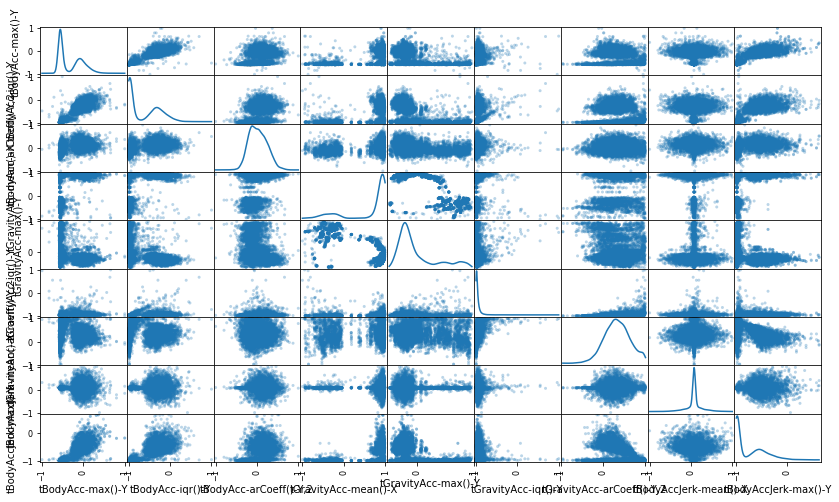

In [9]:
# Scatterplot de algumas variáveis, para se ter uma ideia da forma geral de algumas variáveis.

pd.plotting.scatter_matrix(dt_train[dt_train.columns[range(10,100,10)]], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Próximo passo é separar os features da variável dependente, para iniciar a engenharia de características.

In [10]:
# Separa as características e as variáveis dependentes do conjuntos de treino e de teste
# Para a variável dependente, é feito pretratamento tornanto-o binário: 'LAYING' e 'NOT_LAYING'

tgt_unique_values = dt_train['Activity'].unique()

X_train = dt_train.drop(columns=['subject', 'Activity'])
y_train = dt_train['Activity'].replace(tgt_unique_values[tgt_unique_values!='LAYING'], 'NOT_LAYING')

X_test = dt_test.drop(columns=['subject', 'Activity'])
y_test = dt_test['Activity'].replace(tgt_unique_values[tgt_unique_values!='LAYING'], 'NOT_LAYING')

### Engenharia de características

O conjunto de treino apresenta uma grande quantidade de características, 562, em comparação com o número de observações, apenas 7352.

Investigarei possíveis correlações entre elas, para tentar reduzir o número de dimensões do conjunto. Para isso, utilizarei análise de componentes principais.

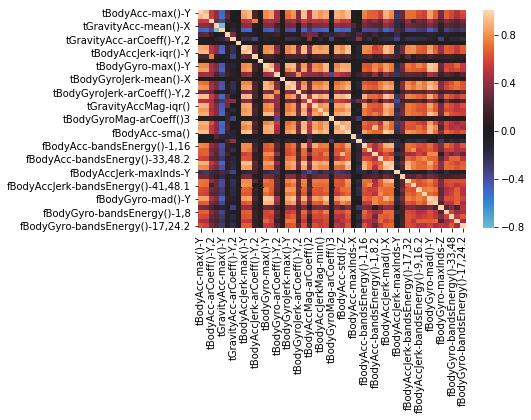

In [11]:
# Cria um mapa de calor para um subconjunto de características. 
# Foram escolhidas features múltiplas de 10, de modo a cobrir uma parte significativa das 562 características.
sns.heatmap(dt_train[dt_train.columns[range(10,500,10)]].corr(), center=0)

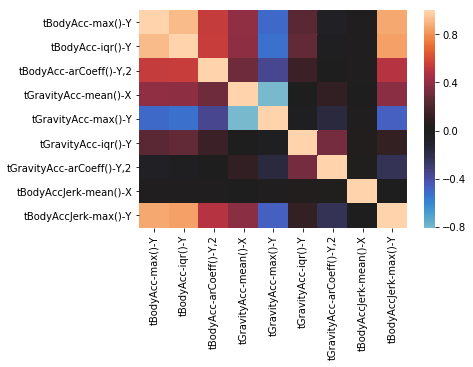

In [12]:
sns.heatmap(dt_train[dt_train.columns[range(10,100,10)]].corr(), center=0)

O mapa de calor confirma o que suspeitávamos: que há muitos pares de características altamente correlacionadas. Podemos concluir que há bastante espaço para reduzir a dimensionalidade do conjunto de dados.

Em seguida, aplicada a análise de componentes principais (PCA)

In [13]:
# Importa a função de cálculo de PCA, e em seguida calcula as 50 principais componentes para o conjunto de treino.
from sklearn.decomposition import PCA

pca = PCA(n_components=50).fit(X_train)

# Soma a variância relativa explicada pelas componentes.
np.sum(pca.explained_variance_ratio_)

0.9308517228406525

In [14]:
# Exibe os valores de variância explicada para cada variável
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.625544
1,0.049130
2,0.041215
3,0.018750
4,0.016949
5,0.012721
6,0.011767
7,0.010690
8,0.009694
9,0.008580


In [15]:
# Investigar as características mais importantes para o primeiro componentes principais

components = pd.DataFrame(pca.components_)

components.columns = X_train.columns

pd.DataFrame(components.iloc[0].sort_values(ascending=False)).head(20)

,0
fBodyAccJerk-entropy()-X,0.125230
fBodyAccJerk-entropy()-Y,0.122470
tBodyAccJerkMag-entropy(),0.120568
fBodyAcc-entropy()-X,0.120216
fBodyAccMag-entropy(),0.113367
tBodyGyroJerkMag-entropy(),0.112255
fBodyBodyAccJerkMag-entropy(),0.112088
fBodyAcc-entropy()-Y,0.110593
tGravityAccMag-entropy(),0.107665
tBodyAccMag-entropy(),0.107665


In [16]:
# O mesmo para a segunda componente principal
pd.DataFrame(components.iloc[1].sort_values(ascending=False)).head(20)

,1
tBodyGyroMag-arCoeff()1,0.137358
fBodyAcc-meanFreq()-Z,0.129639
"tGravityAcc-arCoeff()-Z,1",0.121975
fBodyAccMag-meanFreq(),0.121839
"tGravityAcc-arCoeff()-Y,1",0.120375
tGravityAccMag-arCoeff()1,0.119955
tBodyAccMag-arCoeff()1,0.119955
"tGravityAcc-arCoeff()-Y,3",0.118866
fBodyBodyGyroMag-meanFreq(),0.115728
"tGravityAcc-arCoeff()-Z,3",0.110534


In [17]:
# Transforma as variáveis dos conjuntos de treino e de teste
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [18]:
X_train_transformed.shape

(7352, 50)

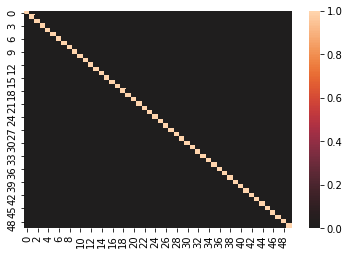

In [19]:
# Exibe um mapa de calor da correlação entre as variáveis transformadas.
sns.heatmap(pd.DataFrame(X_train_transformed).corr(), center=0)

A análise de PCA foi feita para 30 componentes, que foram capazes de explicar mais de 95% da variância existente no conjunto de dados. O resultado é mais evidente no mapa de calor de correlação das variáveis transformadas, todas em torno de 0.

### Implantação do algoritmo de aprendizagem

Treino e teste de 4 algorimos diferentes:
- Regressão logística
- NaiveBayes
- Support vector machine
- K-nearest neighbors

Os algoritmos serão treinados levando-se em conta um _target_ binário: `'LAYING'` e `'NOT_LAYING'`.

In [20]:
from time import time
from sklearn.metrics import accuracy_score, recall_score


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado em acurácia e recall. '''
        
    # Indica o tamanho do classificador e do conjunto de treinamento
    print("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))

    # Inicia o relógio, treina o classificador e então o relógio para
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    train_time = end - start

    # Inicia o relógio, faz estimativas e, então, o relógio para
    y_pred_train = clf.predict(X_train)
    start = time()
    y_pred_test = clf.predict(X_test)
    end = time()
    predict_time = end - start
    
    # Calcula resultados de estimativas com conjuntos de treino e de teste
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_train = recall_score(y_train, y_pred_train, pos_label='LAYING')
    acc_test = accuracy_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test, pos_label='LAYING')
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    result = {'clf name': clf.__class__.__name__, 
              'train time': train_time,
              'predict time': predict_time,
              'accuracy train': acc_train,
              'recall train': rec_train,
              'accuracy test': acc_test,
              'recall test': rec_test,
             }
    return result

In [21]:
# Importa os três modelos de aprendizagem supervisionada do sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Inicializa os três modelos
lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
classifiers = [lr, svc, knn, nb]

results = []

for clf in classifiers:
    results.append(train_predict(clf, X_train_transformed, y_train, X_test_transformed, y_test))
    print()

Treinando um LogisticRegression com 7352 pontos de treinamento. . .

Treinando um SVC com 7352 pontos de treinamento. . .

Treinando um KNeighborsClassifier com 7352 pontos de treinamento. . .

Treinando um GaussianNB com 7352 pontos de treinamento. . .



In [22]:
# Verifica os resultados obtidos para os diversos modelos de aprendizagem treinados.
pd.DataFrame(results)

,accuracy test,accuracy train,clf name,predict time,recall test,recall train,train time
0,1.000000,1.000000,LogisticRegression,0.000000,1.000000,1.000000,0.068000
1,1.000000,0.999728,SVC,0.027000,1.000000,1.000000,0.101004
2,0.999321,0.999592,KNeighborsClassifier,0.512995,0.996276,1.000000,0.019000
3,0.999321,0.994695,GaussianNB,0.003999,1.000000,0.995736,0.012985


A análise mostra um desempenho bastante elevado, tanto com relação a treino quanto a teste, para os modelos de regressão logística e de _support vector machine_. O modelo de regressão logística ainda apresentou tempos de treino e predição cerca de 4 vezes menor que o SVC, sendo este o modelo escolhido.

As pontuações extremamente elevadas podem ser atribuídas à baixa complexidade do problema: a atividade alvo `'LAYING'` é a única dentre as atividades na qual a pessoa está na horizontal e sem movimentos intensos.

In [23]:
# Exibe os coeficientes e intercepro para o modelo de regressão logística que foi treinado
print(lr.get_params())

print(lr.coef_)

print(lr.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[[ 0.42779864 -0.48217547 -3.4809004   0.66478243  0.62232274  0.59626596
  -0.70121138 -0.41408639 -0.23671593  0.37172536  0.91730549  0.09706035
  -0.80466265 -0.48026187 -0.41109449  0.075413    0.46093117  0.2692913
  -0.39605764  0.01518549  0.22679135 -1.68647168 -1.05446945 -0.56058174
  -0.70075421  0.87958652  0.10535412  0.68368367  0.442702   -0.23413501
  -0.80433183 -1.08759743 -0.15902406 -0.79860356  0.25780792  0.09028198
  -0.15041232  0.10057705  0.08555177 -0.44691126  0.6953904   0.0236701
   0.47583842 -0.40746703 -0.90967775  0.41906108 -0.966801   -0.65728239
  -0.06518267  0.15516741]]
[4.80208285]


In [24]:
# Exibe uma matriz de confusão em relação aos dados de treinamento e suas previsões pelo modelo.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test_transformed))

array([[ 537,    0],
       [   0, 2410]], dtype=int64)

In [25]:
pd.DataFrame(X_train_transformed).describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,...,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03
mean,6.951277e-16,-2.422799e-16,-5.023903e-17,8.088077e-17,2.366321e-17,-9.338815e-17,3.414328e-17,-2.304407e-16,-4.149745e-17,3.238402e-17,...,5.705900e-17,4.212414e-17,7.832116e-17,-1.302458e-17,3.554012e-17,1.081984e-17,-3.121370e-17,-4.272441e-17,-4.552941e-18,-6.520220e-17
std,5.901155e+00,1.653798e+00,1.514725e+00,1.021653e+00,9.713480e-01,8.415179e-01,8.093532e-01,7.714208e-01,7.346068e-01,6.911244e-01,...,3.276562e-01,3.242595e-01,3.175704e-01,3.160571e-01,3.096992e-01,2.985182e-01,2.953199e-01,2.952489e-01,2.917372e-01,2.892841e-01
min,-6.634712e+00,-5.246209e+00,-2.566356e+00,-2.386863e+00,-3.756680e+00,-2.348213e+00,-2.394273e+00,-2.961880e+00,-2.557886e+00,-2.131191e+00,...,-1.285959e+00,-1.244845e+00,-1.258536e+00,-1.193587e+00,-1.225280e+00,-1.155853e+00,-1.403166e+00,-1.189361e+00,-1.198709e+00,-1.184663e+00
25%,-5.572821e+00,-1.176902e+00,-1.183240e+00,-6.637966e-01,-6.349455e-01,-6.045443e-01,-5.659694e-01,-5.554817e-01,-4.911498e-01,-4.870089e-01,...,-2.111886e-01,-2.081696e-01,-2.103377e-01,-2.035618e-01,-1.975440e-01,-1.990852e-01,-1.901764e-01,-1.961364e-01,-1.908489e-01,-1.926017e-01
50%,-3.315931e+00,6.400356e-02,-1.513454e-01,-2.809466e-02,-5.503291e-02,-4.833232e-02,-9.275539e-03,-4.931946e-02,-2.031375e-02,-2.385251e-02,...,-1.785315e-03,-2.718851e-03,3.712755e-04,1.982340e-03,-5.004450e-03,-4.596725e-04,-8.962290e-03,-5.596440e-03,-6.886790e-03,-2.495474e-03
75%,5.638173e+00,1.145365e+00,4.586569e-01,5.298824e-01,5.703505e-01,5.345456e-01,5.383380e-01,5.508243e-01,4.884841e-01,4.668381e-01,...,2.097479e-01,2.066759e-01,2.102361e-01,2.099138e-01,1.925756e-01,1.977408e-01,1.900793e-01,1.873101e-01,1.786850e-01,1.905143e-01
max,1.920990e+01,8.979156e+00,5.341293e+00,6.945572e+00,4.568769e+00,4.335195e+00,2.803487e+00,3.480888e+00,3.055470e+00,2.362241e+00,...,1.311799e+00,1.910254e+00,1.365217e+00,1.245589e+00,1.913323e+00,1.242778e+00,1.510728e+00,1.946164e+00,1.828077e+00,2.036192e+00


O código a seguir, adaptado de [https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression], é uma tentativa de enxergar a fronteira de decisão do modelo treinado. 

As previsões foram calculadas a partir de probabilidades geradas linearmente para as duas primeiras componentes principais, e para as demais componentes utilizei valores iguais a zero, considerando que as médias para as componentes estão todas em torno de zero (devido à PCA), e assim eu poderia centralizar a projeção bidimensional nas duas primeiras componentes em torno da origem. 

[(-20, 20), Text(0,0.5,'$X_2$'), (-20, 20), Text(0.5,0,'$X_1$'), None]

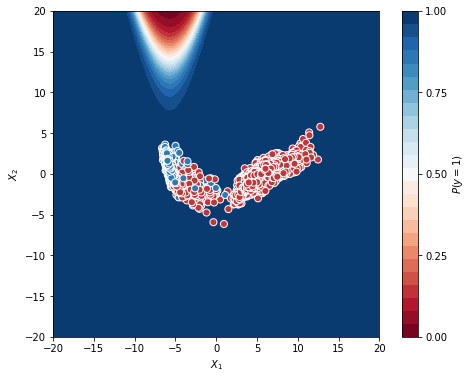

In [26]:
from sklearn.preprocessing import label_binarize

# Cria um grid de pontos com 160000 linhas e 50 colunas, sobre os quais serão calculadas as predições.
# Sendo, as duas primeiras colunas valores de -20 a 20, e as demais colunas iguais a 0.
xx, yy = np.mgrid[-20:20:.1, -20:20:.1]
grid = np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], 48))]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# Cria o gráfico de contrornos, mapeando às cores as probabilidades obtidas pelo modelo.
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# Binariza os rótulos, para serem usados ao mapear em cores no gráf. de dispersão.
label_array = label_binarize(y_test, classes=['NOT_LAYING', 'LAYING']).ravel()

# Cria o gráfico de dispersão
ax.scatter(X_test_transformed[:,0], X_test_transformed[:, 1], c=label_array, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="equal",
       xlim=(-20, 20), ylim=(-20, 20),
       xlabel="$X_1$", ylabel="$X_2$")

O resultado obtido não foi de acordo com o esperado, sendo bastante desafiador a projeção da fronteria de decisão no espaço bidimensional. 

Encontrei um artigo que sugere o uso de retículos Voronoi para estimar a froneira de decisão[http://dare.uva.nl/document/2/164710], mas achei que seria um trabalho além do escopo pretendido aqui. 

Finalmente, decidi utilizar uma transformação TSNE _(t-distributed Stochastic Neighbor Embedding)_, para reduzir as 50 componentes principais para 2, e assim fazer um mapa bidimensional dos dados.

In [27]:
from sklearn.manifold import TSNE
X_all_transformed = np.append(X_train_transformed, X_test_transformed, axis=0)
X_all_embedded = TSNE(n_components=2, perplexity=30, verbose=2).fit_transform(X_all_transformed)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.023s...
[t-SNE] Computed neighbors for 10299 samples in 3.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.130729
[t-SNE] Computed conditional probabilities in 0.324s
[t-SNE] Iteration 50: error = 97.671

In [29]:
X_all_embedded

array([[-13.862757, -69.521   ],
       [-40.409527, -11.376982],
       [-31.250679, -50.883713],
       ...,
       [ 23.411964,  36.24541 ],
       [ 23.800705,  36.844185],
       [ 23.772095,  36.80532 ]], dtype=float32)

[(-100, 100),
 Text(0,0.5,'$X_2 (t-SNE)$'),
 (-100, 100),
 Text(0.5,0,'$X_1 (t-SNE)$'),
 Text(0.5,1,'Test data'),
 None]

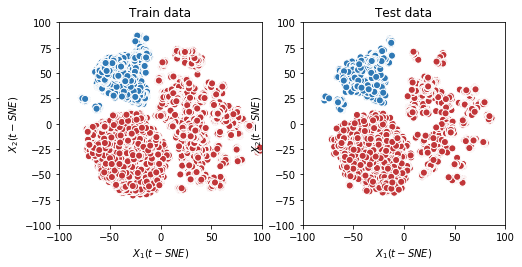

In [30]:
from sklearn.preprocessing import label_binarize

# Cria o gráfico
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 8))

# Binariza os rótulos, para serem usados ao mapear em cores no gráf. de dispersão.
label_array_train = label_binarize(y_train, classes=['NOT_LAYING', 'LAYING']).ravel()

# Cria o gráfico de dispersão - treino
ax1.scatter(X_all_embedded[:7352,0], X_all_embedded[:7352, 1], c=label_array_train, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax1.set(aspect="equal", title="Train data",
       xlim=(-100, 100), ylim=(-100, 100),
       xlabel="$X_1 (t-SNE)$", ylabel="$X_2 (t-SNE)$")

# Binariza os rótulos, para serem usados ao mapear em cores no gráf. de dispersão.
label_array_test = label_binarize(y_test, classes=['NOT_LAYING', 'LAYING']).ravel()

# Cria o gráfico de dispersão - teste
ax2.scatter(X_all_embedded[7352:,0], X_all_embedded[7352:, 1], c=label_array_test, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax2.set(aspect="equal", title="Test data",
       xlim=(-100, 100), ylim=(-100, 100),
       xlabel="$X_1 (t-SNE)$", ylabel="$X_2 (t-SNE)$")